# Harder CTD profiles...

Let's take a chance on a harder profile. Here's a plot of the cleaned up data.

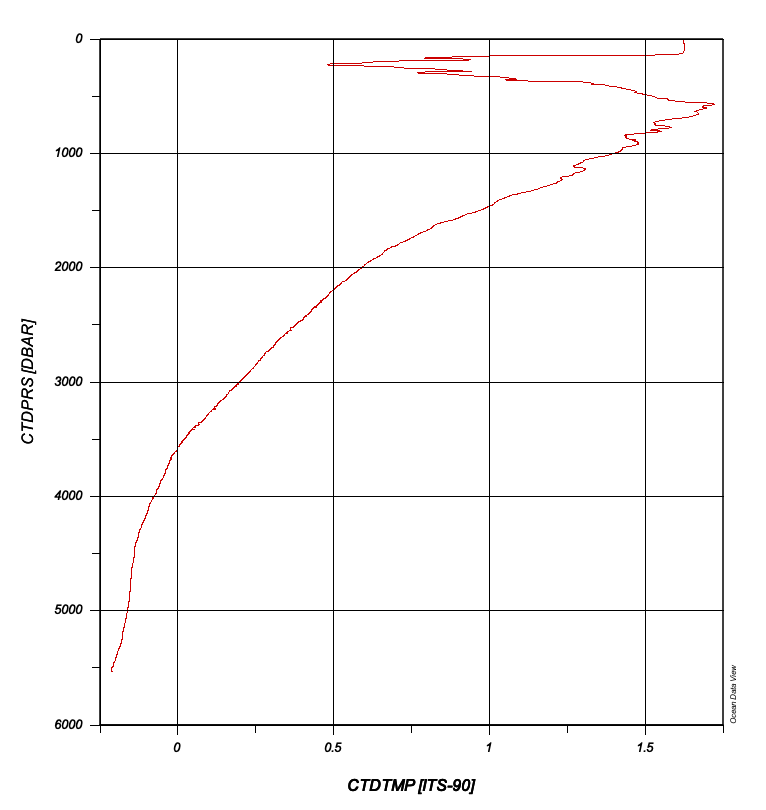

The order of actions for calibration:

1. (Optional) Convert from hex to ASCII
2. Ondeck pressure calibration
3. Align water parcel/pump speed
4. Filter ctd data
5. Remove outliers
6. 

In [1]:
from pathlib import Path
import ctd

In [2]:
#put relative path in here
path = Path('i06_original_resolution_cnv')
#final file name here
fname = path.joinpath('03501.cnv.zip')

Let's plot the temperature without any processing and see what comes out.

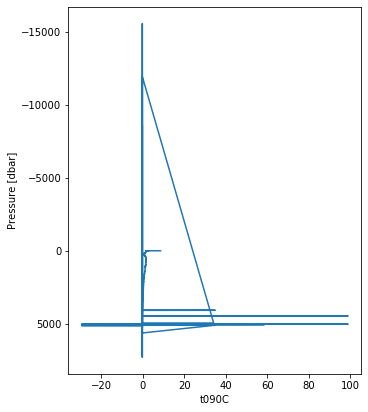

In [3]:
down, up = ctd.from_cnv(fname).split()
ax = down['t090C'].plot_cast()

Huh. Well, the profile has some problems. (Sea cable transmission error, if you believe it or not.) Let's clean it up.

In [4]:
#before you start messing with data, make sure to make a copy first for safety!
down_start = down.copy()
down = down_start.copy()
down_start

depSM   t090C    c0mS/cm   t190C    c1mS/cm    sal00  \
Pressure [dbar]                                                            
 0.003              0.003  8.6228   5.304265  7.6236   1.137705   4.2746   
-0.029             -0.029  8.6222   5.302244  7.6231   1.137113   4.2729   
-0.029             -0.029  8.6213   5.299614  7.6223   1.136864   4.2707   
-0.029             -0.029  8.6206   5.296603  7.6217   1.136833   4.2682   
-0.029             -0.029  8.6198   5.292715  7.6210   1.136490   4.2650   
-0.029             -0.029  8.6193   5.288104  7.6205   1.136397   4.2611   
-0.029             -0.029  8.6185   5.282960  7.6198   1.136210   4.2567   
 0.003              0.003  8.6178   5.277018  7.6193   1.135774   4.2517   
-0.029             -0.029  8.6173   5.270086  7.6185   1.135556   4.2458   
-0.029             -0.029  8.6165   5.262585  7.6179   1.135462   4.2394   
-0.020             -0.020  8.6159   5.254476  7.6171   1.135088   4.2325   
-0.029             -0.029  8.6149   5.245380  7.6164   1.135213   4.2248   
-0.029             -0.029  8.6146   5.235032  7.6158   1.135680   4.2160   
-0.029             -0.029  8.6136   5.224230  7.6150   1.135711   4.2068   
-0.029             -0.029  8.6133   5.212900  7.6143   1.135337   4.1971   
-0.029             -0.029  8.6126   5.200358  7.6135   1.135431   4.1864   
-0.029             -0.029  8.6116   5.187518  7.6130   1.135244   4.1755   
 0.003              0.003  8.6113   5.174227  7.6121   1.134434   4.1641   
-0.029             -0.029  8.6107   5.160221  7.6118   1.133468   4.1521   
-0.029             -0.029  8.6101   5.146107  7.6110   1.132876   4.1401   
-0.029             -0.029  8.6095   5.131772  7.6102   1.132098   4.1278   
-0.029             -0.029  8.6090   5.116914  7.6098   1.131070   4.1151   
-0.020             -0.020  8.6081   5.102176  7.6090   1.130104   4.1026   
-0.029             -0.029  8.6077   5.087293  7.6086   1.128983   4.0899   
 0.003              0.003  8.6071   5.072418  7.6079   1.127301   4.0772   
-0.029             -0.029  8.6066   5.057550  7.6075   1.125277   4.0645   
-0.029             -0.029  8.6061   5.043067  7.6068   1.123160   4.0521   
-0.029             -0.029  8.6057   5.029120  7.6063   1.120700   4.0402   
-0.029             -0.029  8.6049   5.015519  7.6057   1.117680   4.0286   
 0.003              0.003  8.6048   5.001773  7.6057   1.114972   4.0168   
...                   ...     ...        ...     ...        ...      ...   
 5138.632        5031.891 -0.1706  30.623695 -0.1714  30.612177  34.6564   
 5138.632        5031.891 -0.1706  30.623634 -0.1714  30.612058  34.6564   
 5138.855        5032.107 -0.1705  30.623387 -0.1713  30.612118  34.6558   
 5138.808        5032.061 -0.1706  30.623696 -0.1716  30.611940  34.6564   
 5138.941        5032.190 -0.1707  30.623881 -0.1714  30.611881  34.6567   
 5139.031        5032.277 -0.1708  30.623696 -0.1716  30.611763  34.6565   
 5139.117        5032.360 -0.1704  30.623512 -0.1716  30.611823  34.6558   
 5139.159        5032.401 -0.1707  30.623573 -0.1713  30.611882  34.6562   
 5139.250        5032.489 -0.1706  30.623635 -0.1716  30.611882  34.6562   
 5139.383        5032.618 -0.1706  30.623389 -0.1718  30.612179  34.6557   
 5139.426        5032.659 -0.1706  30.623327 -0.1716  30.612179  34.6556   
 5139.511        5032.742 -0.1709  30.623451 -0.1718  30.612179  34.6561   
 5139.996        5033.211 -0.1709  30.623329 -0.1718  30.612062  34.6558   
 5140.086        5033.299 -0.1709  30.623514 -0.1719  30.611885  34.6559   
 5140.214        5033.422 -0.1710  30.623638 -0.1721  30.611885  34.6562   
 5140.262        5033.469 -0.1709  30.623638 -0.1719  30.612063  34.6561   
 5140.347        5033.551 -0.1709  30.623392 -0.1721  30.612063  34.6557   
 5140.480        5033.680 -0.1712  30.623454 -0.1721  30.612123  34.6561   
 5140.523        5033.722 -0.1712  30.623763 -0.1721  30.612182  34.6564   
 5140.566        5033.763 -0.1710  30.623701 -0.1719  30.612182  34.

The loading routine sets the index on pressure to start, so let's begin by dropping the index.

In [5]:
down = down.reset_index()

In [6]:
#Check in Index that pressure appears as 'Pressure [dbar]'
down.axes

[RangeIndex(start=0, stop=200024, step=1),
 Index(['Pressure [dbar]', 'depSM', 't090C', 'c0mS/cm', 't190C', 'c1mS/cm',
        'sal00', 'sal11', 'sbox0Mm/Kg', 'flECO-AFL', 'turbWETbb0', 'v0', 'v1',
        'v2', 'v3', 'v4', 'v5', 'v7', 'latitude', 'longitude', 'timeS',
        'sbeox0V', 'timeY', 'altM', 'flag'],
       dtype='object')]

Let's remove values are clearly not valid for pressure.

In [7]:
#Values are in decibar
min_depth = 5
max_depth = 6000

#Only accept values that are within acceptable ranges
down = down[down['Pressure [dbar]'] > min_depth]
down = down[down['Pressure [dbar]'] < max_depth]

In [8]:
down

Pressure [dbar]     depSM   t090C    c0mS/cm   t190C    c1mS/cm  \
11419             5.040     4.994  1.9354  30.697667  1.6646  30.051194   
11420             5.030     4.985  1.9113  30.693101  1.6572  30.050430   
11421             5.068     5.022  1.8932  30.689584  1.6507  30.049431   
11422             5.100     5.054  1.8785  30.687116  1.6453  30.048491   
11423             5.110     5.063  1.8653  30.685451  1.6414  30.048315   
11424             5.138     5.091  1.8518  30.684711  1.6392  30.047668   
11425             5.138     5.091  1.8385  30.684589  1.6380  30.047903   
11426             5.180     5.133  1.8256  30.685208  1.6367  30.048433   
11427             5.170     5.124  1.8130  30.686259  1.6357  30.049668   
11428             5.203     5.156  1.7989  30.688050  1.6352  30.051668   
11429             5.203     5.156  1.7848  30.690089  1.6350  30.058138   
11430             5.245     5.198  1.7734  30.693177  1.6349  30.064726   
11431             5.240     5.193  1.7655  30.697005  1.6345  30.069785   
11432             5.273     5.225  1.7613  30.702130  1.6341  30.076021   
11433             5.273     5.225  1.7602  30.708367  1.6336  30.082375   
11434             5.282     5.235  1.7607  30.716024  1.6337  30.088789   
11435             5.306     5.258  1.7605  30.725164  1.6336  30.095321   
11436             5.306     5.258  1.7591  30.735911  1.6338  30.102147   
11437             5.315     5.267  1.7574  30.747710  1.6344  30.108386   
11438             5.306     5.258  1.7559  30.758645  1.6346  30.113389   
11439             5.343     5.295  1.7558  30.766678  1.6354  30.117509   
11440             5.343     5.295  1.7625  30.771682  1.6358  30.120805   
11441             5.348     5.300  1.7915  30.775881  1.6366  30.123278   
11442             5.343     5.295  1.8403  30.780264  1.6420  30.125691   
11443             5.343     5.295  1.8980  30.783905  1.6563  30.125925   
11444             5.348     5.299  1.9568  30.786804  1.6738  30.124746   
11445             5.343     5.295  2.0167  30.791681  1.6905  30.122272   
11446             5.306     5.258  2.0791  30.798288  1.7038  30.119680   
11447             5.343     5.295  2.1411  30.803228  1.7132  30.118031   
11448             5.348     5.299  2.1966  30.807488  1.7193  30.116971   
...                 ...       ...     ...        ...     ...        ...   
199993         5138.504  5031.767 -0.1703  30.623386 -0.1712  30.612058   
199994         5138.632  5031.891 -0.1706  30.623695 -0.1714  30.612177   
199995         5138.632  5031.891 -0.1706  30.623634 -0.1714  30.612058   
199996         5138.855  5032.107 -0.1705  30.623387 -0.1713  30.612118   
199997         5138.808  5032.061 -0.1706  30.623696 -0.1716  30.611940   
199998         5138.941  5032.190 -0.1707  30.623881 -0.1714  30.611881   
199999         5139.031  5032.277 -0.1708  30.623696 -0.1716  30.611763   
200000         5139.117  5032.360 -0.1704  30.623512 -0.1716  30.611823   
200001         5139.159  5032.401 -0.1707  30.623573 -0.1713  30.611882   
200002         5139.250  5032.489 -0.1706  30.623635 -0.1716  30.611882   
200003         5139.383  5032.618 -0.1706  30.623389 -0.1718  30.612179   
200004         5139.426  5032.659 -0.1706  30.623327 -0.1716  30.612179   
200005         5139.511  5032.742 -0.1709  30.623451 -0.1718  30.612179   
200006         5139.996  5033.211 -0.1709  30.623329 -0.1718  30.612062   
200007         5140.086  5033.299 -0.1709  30.623514 -0.1719  30.611885   
200008         5140.214  5033.422 -0.1710  30.623638 -0.1721  30.611885   
200009         5140.262  5033.469 -0.1709  30.623638 -0.1719  30.612063   
200010         5140.347  5033.551 -0.1709  30.623392 -0.1721  30.612063   
200011         5140.480  5033.680 -0.1712  30.623454 -0.1721  30.612123   
200012         5140.523  5033.722 -0.1712  30.623763 -0.1721  30.612182   
200013         5140.566  5033.763 -0.1710  30.623701 -0.1719  30.612182   
200014         5140.699  5033.892

Okay, we've removed clearly bad data. That's probably enough to try running it again, so let's reset the index to pressure, and remove the extra index.

In [9]:
down = down.set_index('Pressure [dbar]')
# drop 'index' for cleanup
#down = down.drop(columns=['index'])
#down.axes

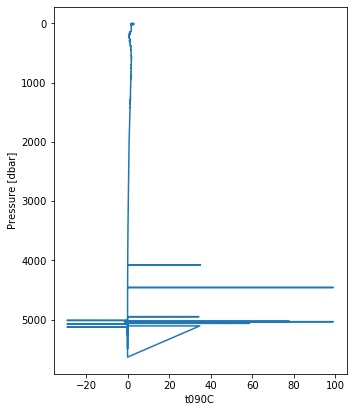

In [10]:
ax = down['t090C'].plot_cast()

In [11]:
#proc = down.remove_above_water()\
#           .despike(n1=2, n2=20, block=100)\
#           .lp_filter()\
#           .press_check()\
#           .interpolate() \
#           .bindata(delta=1)\
#           .smooth(window_len=21, window='hanning')

Remove data out of water... but we've done that already.

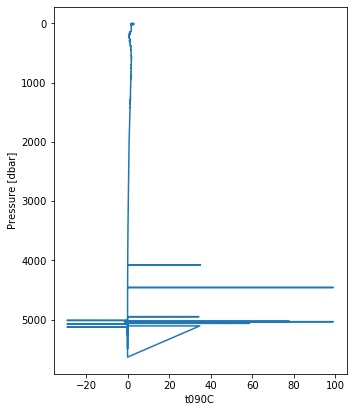

In [12]:
proc = down.remove_above_water()
ax = proc['t090C'].plot_cast()

Remove big spikes from the data.

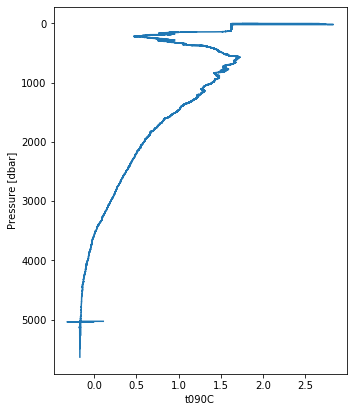

In [13]:
proc = proc.despike(n1=2, n2=20, block=100)
ax = proc['t090C'].plot_cast()

Run a low pass filter over the data.

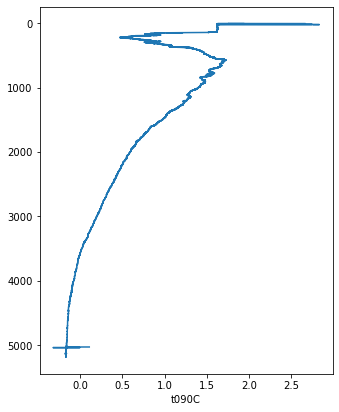

In [14]:
proc = proc.lp_filter()
ax = proc['t090C'].plot_cast()

Remove pressure reversals from the index.

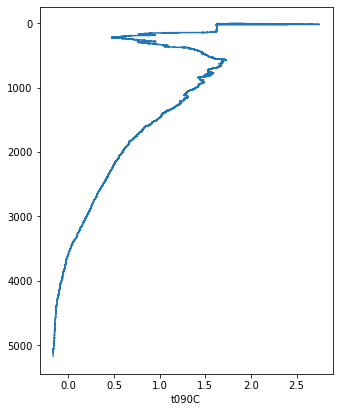

In [15]:
proc = proc.press_check()
ax = proc['t090C'].plot_cast()

Do interpolation using the built-in pandas method. Default setting is linear, but we shouldn't have any bins that need to be interpolated.

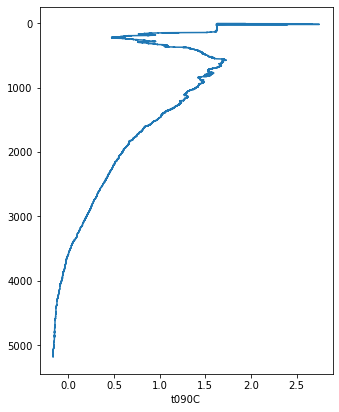

In [16]:
proc = proc.interpolate()
ax = proc['t090C'].plot_cast()

Bin the index to a given value. The index is set to pressure by default, and we've set the value (delta) to 1.

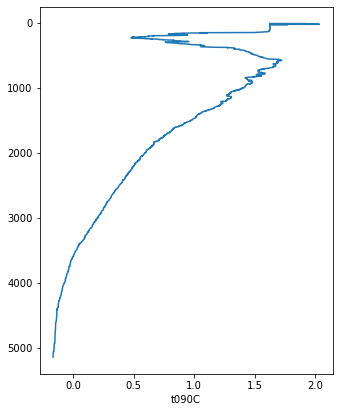

In [17]:
proc = proc.bindata(delta=1)
ax = proc['t090C'].plot_cast()

Smooth the data. There are a few windows to use, here we use Hann or Hanning.

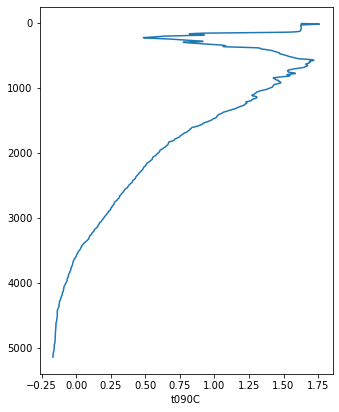

In [18]:
proc = proc.smooth(window_len=21, window='hanning')
ax = proc['t090C'].plot_cast()

What problems are still in the data?

1. The data doesn't extend to the surface.
2. There's a small spike near the surface - this shouldn't happen in the mixed layer especially for temperature.
3. We haven't checked if the temperature water samples are aligned in time with salinity, so there might be a bias.
4. We haven't applied corrections for viscous heating.
5. 

In [19]:
proc.head()

depSM     t090C    c0mS/cm     t190C    c1mS/cm      sal00  \
6.5   31.091624  1.629283  29.731364  1.623404  29.688353  34.067104   
7.5   30.062858  1.654355  29.785546  1.624306  29.701075  34.107962   
8.5   29.087157  1.679010  29.837580  1.625231  29.713332  34.146593   
9.5   28.231016  1.702453  29.884551  1.626176  29.724552  34.180237   
10.5  27.571059  1.722401  29.922603  1.627043  29.733840  34.206537   

          sal11  sbox0Mm/Kg  flECO-AFL  turbWETbb0  ...        v4   v5   v7  \
6.5   34.020044  315.656831   0.114135    0.000110  ...  0.012166  0.0  0.0   
7.5   34.035692  311.998223   0.113975    0.000109  ...  0.012234  0.0  0.0   
8.5   34.050698  308.439468   0.113829    0.000108  ...  0.012302  0.0  0.0   
9.5   34.064312  305.171670   0.113707    0.000107  ...  0.012366  0.0  0.0   
10.5  34.075466  302.439904   0.113626    0.000106  ...  0.012423  0.0  0.0   

       latitude  longitude       timeS   sbeox0V         timeY      altM  flag  
6.5  -55.001294  30.001544  671.538117  2.302100  1.556450e+09  0.239143   0.0  
7.5  -55.001296  30.001548  663.180453  2.283966  1.556450e+09  0.240857   0.0  
8.5  -55.001299  30.001552  655.151302  2.266258  1.556450e+09  0.242556   0.0  
9.5  -55.001301  30.001556  647.985282  2.249821  1.556450e+09  0.244167   0.0  
10.5 -55.001302  30.001559  642.431950  2.235831  1.556450e+09  0.245582   0.0  

[5 rows x 24 columns]

In [20]:
#ax = proc['t090C'].plot_cast()